In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

# Reading images

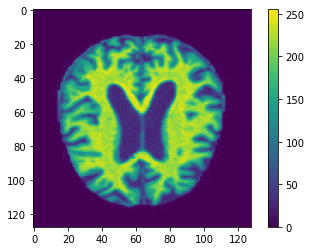

In [2]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

In [3]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [4]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    moderate.append(image)


In [5]:
mild = np.array(mild)

very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [6]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [7]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(6400, 128, 128, 3)

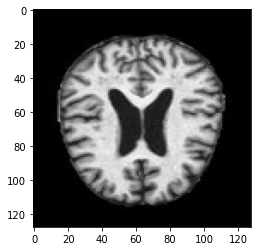

In [8]:
plt.imshow(very_mild[0])

In [9]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

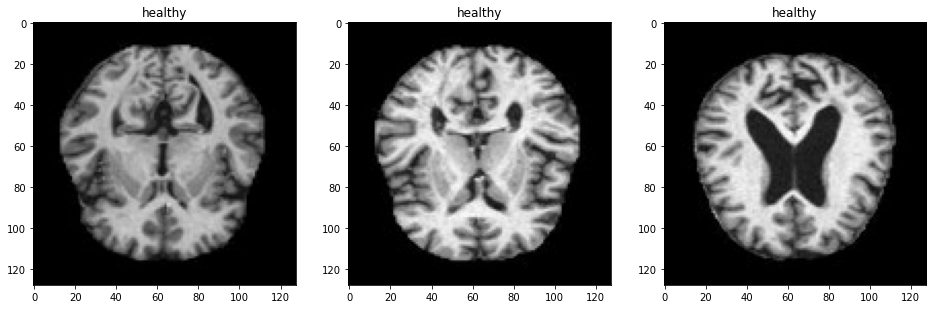

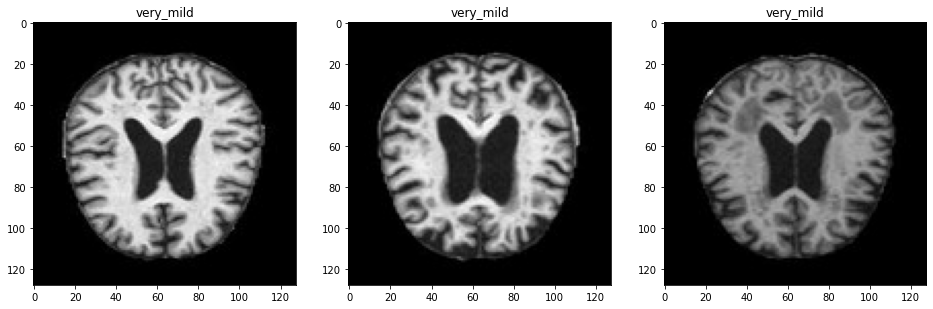

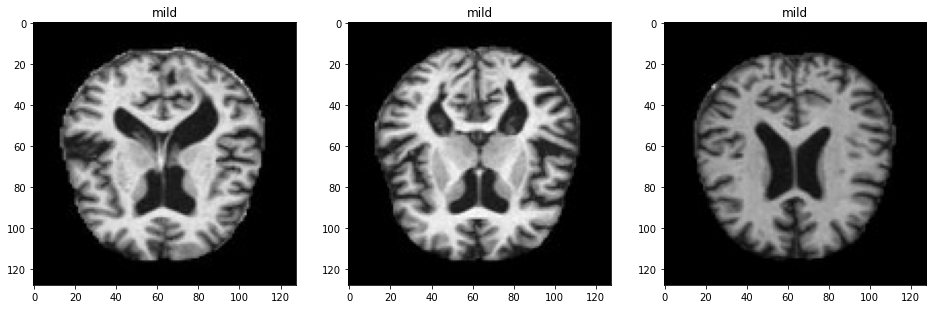

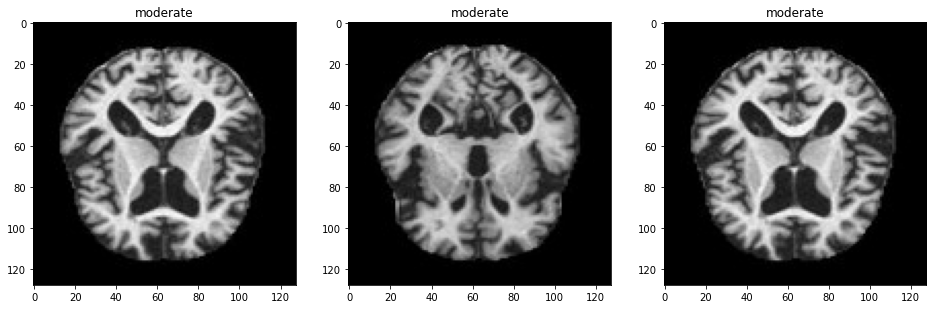

In [10]:
plot_random(mild, very_mild, moderate, healthy)

# Data prep

normalisation, flattening, 1D labels. 

In [49]:
mild.shape

(896, 128, 128, 3)

Mean of normalized data: 0.2615434088292919
Standard deviation of normalized data: 0.31419590740073766


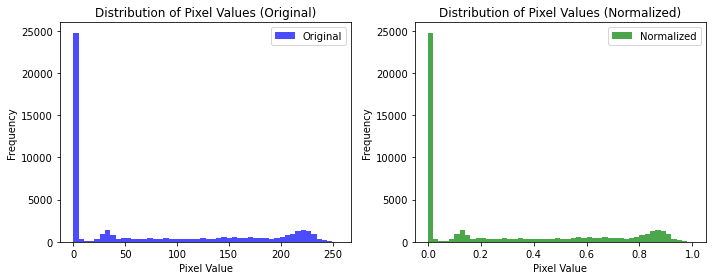

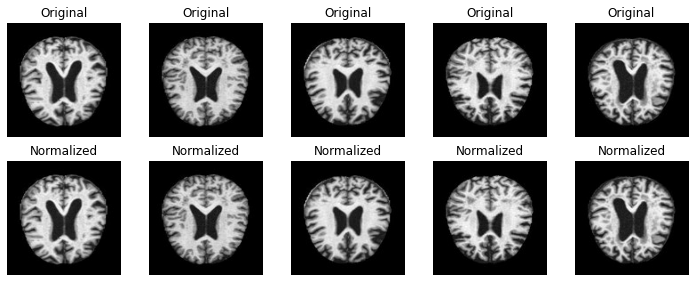

In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Reshape the image data to a 2D array where each row represents a flattened image
n_samples = mild.shape[0]
flattened_images = mild.reshape(n_samples, -1)

# Create a StandardScaler instance for normalisation
# scaler = StandardScaler()

# Fit the scaler on the flattened image data and transform. Using the scaler function does not work as 
# there are possible outliers. This is explored further on.
# normalized_flattened_images = scaler.fit_transform(flattened_images)
# Manual normalisation works without the scaler.
normalized_flattened_images = (flattened_images - np.min(flattened_images)) / (np.max(flattened_images) - np.min(flattened_images))

# Calculate mean and standard deviation of normalized data
mean_normalized = np.mean(normalized_flattened_images)
std_normalized = np.std(normalized_flattened_images)

print("Mean of normalized data:", mean_normalized)
print("Standard deviation of normalized data:", std_normalized)

# Visualize the distribution of flattened pixel values before and after normalization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(flattened_images[0], bins=50, color='blue', alpha=0.7, label='Original')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values (Original)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(normalized_flattened_images[0], bins=50, color='green', alpha=0.7, label='Normalized')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values (Normalized)')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize a few original and normalized images side by side
num_images_to_visualize = 5

plt.figure(figsize=(10, 4))
for i in range(num_images_to_visualize):
    plt.subplot(2, num_images_to_visualize, i + 1)
    plt.imshow(mild[i])
    plt.axis('off')
    plt.title("Original")

    # Reshape the flattened image back to its original dimensions (128x128x3 in this example)
    reshaped_image = normalized_flattened_images[i].reshape(128, 128, 3)
    
    plt.subplot(2, num_images_to_visualize, num_images_to_visualize + i + 1)
    plt.imshow(reshaped_image)
    plt.axis('off')
    plt.title("Normalized")
    
plt.tight_layout()
plt.show()

## Exploring outliers

In [23]:
import numpy as np

# Assuming 'mild' is a NumPy array of shape (num_images, height, width, channels)
# Flatten the images to a 2D array where each row represents a flattened image
n_samples, height, width, channels = mild.shape
flattened_images = mild.reshape(n_samples, -1)

# Calculate the median and IQR for each pixel
median_values = np.median(flattened_images, axis=0)
q1 = np.percentile(flattened_images, 25, axis=0)
q3 = np.percentile(flattened_images, 75, axis=0)
iqr = q3 - q1

# Define a threshold for outlier detection (e.g., 1.5 times IQR)
threshold = 1.5

# Identify outliers based on the threshold
outliers = np.abs(flattened_images - median_values) > threshold * iqr

# Count the number of outliers for each pixel
num_outliers_per_pixel = np.sum(outliers, axis=0)

# Define a threshold for the number of outliers (e.g., consider pixels with more than 100 outliers as outliers)
outlier_threshold = 100

# Create a mask indicating outlier pixels
outlier_mask = num_outliers_per_pixel > outlier_threshold

# Reshape the outlier mask back to the original image dimensions
outlier_mask = outlier_mask.reshape(height, width, channels)

# Display or process the images with identified outliers


In [25]:
mild.shape

(896, 128, 128, 3)

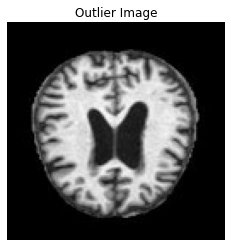

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'mild' is a NumPy array of shape (num_images, height, width, channels)
# Assuming 'outlier_mask' is the binary mask indicating outlier pixels

# Identify outlier images based on the presence of outlier pixels
outlier_images = np.any(outlier_mask, axis=(1, 2))

# Display the values of the outlier images
for i, is_outlier in enumerate(outlier_images):
    if is_outlier:
        outlier_image = mild[i]

# Optionally, you can also display the outlier images using matplotlib
# For example, to display the first outlier image:
outlier_image_indices = np.where(outlier_images)[0]
if len(outlier_image_indices) > 0:
    first_outlier_index = outlier_image_indices[0]
    plt.imshow(mild[first_outlier_index])
    plt.axis('off')
    plt.title("Outlier Image")
    plt.show()


In [33]:
len(outlier_image_indices)

112

Visually comparing outlier and non-outlier images

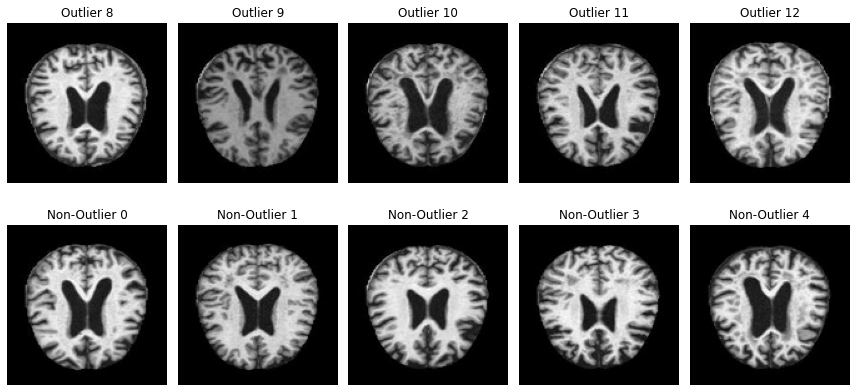

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'mild' is a NumPy array of shape (num_images, height, width, channels)
# Assuming 'outlier_mask' is the binary mask indicating outlier pixels

# Identify outlier images based on the presence of outlier pixels
outlier_images = np.any(outlier_mask, axis=(1, 2))

# Select a few outlier images and non-outlier images for comparison
num_images_to_compare = 5
outlier_indices = np.where(outlier_images)[0][:num_images_to_compare]
non_outlier_indices = np.where(~outlier_images)[0][:num_images_to_compare]

# Create subplots to display images
plt.figure(figsize=(12, 6))

# Display outlier images
for i, outlier_index in enumerate(outlier_indices):
    plt.subplot(2, num_images_to_compare, i + 1)
    plt.imshow(mild[outlier_index])
    plt.axis('off')
    plt.title(f"Outlier {outlier_index}")

# Display non-outlier images
for i, non_outlier_index in enumerate(non_outlier_indices):
    plt.subplot(2, num_images_to_compare, num_images_to_compare + i + 1)
    plt.imshow(mild[non_outlier_index])
    plt.axis('off')
    plt.title(f"Non-Outlier {non_outlier_index}")

plt.tight_layout()
plt.show()


The outliers look visually similar to the non-outlier images. More than 10% of time images are outliers (112/896), this is a quite significant number of the images. It would be worthwhile to perform ML with and without the outliers.

Some statistical analysis of the outliers:

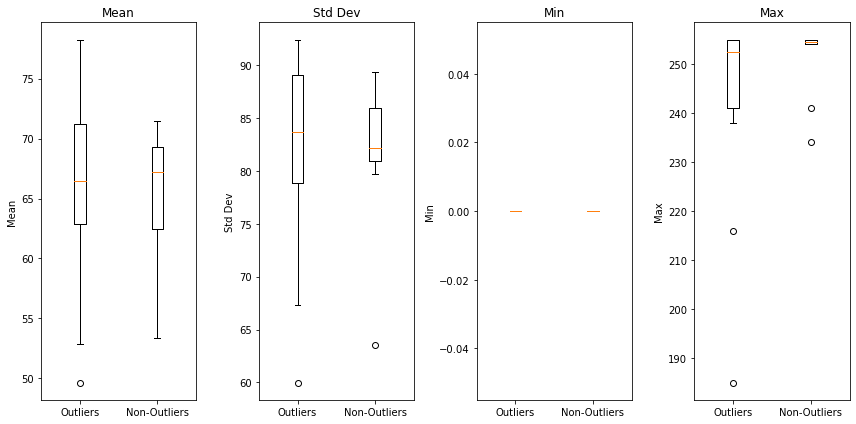

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'mild' is a NumPy array of shape (num_images, height, width, channels)
# Assuming 'outlier_mask' is the binary mask indicating outlier pixels

# Identify outlier images based on the presence of outlier pixels
outlier_images = np.any(outlier_mask, axis=(1, 2))

# Select a few outlier images and non-outlier images for analysis
num_images_to_analyze = 10  # Adjust as needed
outlier_indices = np.where(outlier_images)[0][:num_images_to_analyze]
non_outlier_indices = np.where(~outlier_images)[0][:num_images_to_analyze]

# Calculate statistics for each group (outliers and non-outliers)
outlier_stats = {
    'Mean': [],
    'Std Dev': [],
    'Min': [],
    'Max': [],
}
non_outlier_stats = {
    'Mean': [],
    'Std Dev': [],
    'Min': [],
    'Max': [],
}

for i in outlier_indices:
    image = mild[i]
    outlier_stats['Mean'].append(np.mean(image))
    outlier_stats['Std Dev'].append(np.std(image))
    outlier_stats['Min'].append(np.min(image))
    outlier_stats['Max'].append(np.max(image))

for i in non_outlier_indices:
    image = mild[i]
    non_outlier_stats['Mean'].append(np.mean(image))
    non_outlier_stats['Std Dev'].append(np.std(image))
    non_outlier_stats['Min'].append(np.min(image))
    non_outlier_stats['Max'].append(np.max(image))

# Create subplots to visualize statistics
plt.figure(figsize=(12, 6))

stat_labels = list(outlier_stats.keys())
num_stats = len(stat_labels)

for i, stat_label in enumerate(stat_labels):
    plt.subplot(1, num_stats, i + 1)
    plt.boxplot([outlier_stats[stat_label], non_outlier_stats[stat_label]], labels=['Outliers', 'Non-Outliers'])
    plt.title(stat_label)
    plt.ylabel(stat_label)

plt.tight_layout()
plt.show()


The spread of the mean and standard deviation is higher for the outliers. A couple smaller max values for the outliers.

---

## Data preparation (cont.)

After normalising, some things to take note of what has changed visually:

**Brightness and Contrast:** Normalization could affect the overall brightness and contrast of the images. If the original images had a wide range of pixel values, normalization might bring pixel values closer together, potentially reducing the contrast and making the images appear slightly darker.

**Color Balance:** If the images are in color (RGB format), normalization could potentially impact the color balance by affecting the values of the red, green, and blue channels. However, this effect is usually subtle and might not be easily noticeable.

**Noise:** In some cases, normalization might reduce the impact of noise, making the images appear smoother. This is because normalization can reduce the range of pixel values, potentially mitigating the influence of outliers.

**Visual Impact:** While the above changes might occur, the overall visual impact of normalization is often minimal. The most significant benefits are usually observed during training and optimization processes when the model relies on consistent and standardized input data.

In [39]:
normalized_flattened_images.shape

(896, 49152)

In [40]:
flattened_images.shape

(896, 49152)

Applying the data preparation to the rest of the images

In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have healthy, very_mild, mild, and moderate arrays

# Concatenate the arrays
all_images = np.concatenate((healthy, very_mild, mild, moderate))

# Reshape the combined array to have the shape (total_samples, num_features)
n_samples = all_images.shape[0]
num_features = np.prod(all_images.shape[1:])
flattened_images = all_images.reshape(n_samples, num_features)

# Manual normalisation. Possible to use the scaler() function, however, the outliers must be explored further. 
normalized_flattened_images = (flattened_images - np.min(flattened_images)) / (np.max(flattened_images) - np.min(flattened_images))

# Now normalized_flattened_images is a single array containing all normalized and flattened images

In [46]:
all_images.shape

(6400, 128, 128, 3)

In [47]:
normalized_flattened_images.shape

(6400, 49152)

# Model training

In [ ]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(normalized_flattened_images, labels, stratify= labels, test_size= 0.3, random_state= 42)

In [ ]:
train_set.shape

In [ ]:
test_set.shape

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100

# Applying the data to the model
H = model.fit(train_set, train_labels, validation_data=(test_set, test_labels),
          epochs=epochs, batch_size=64, verbose=1)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set)

In [ ]:
# Convert EagerTensor to a NumPy array
test_labels

# Print a formatted report
print(classification_report(
    test_labels.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

In [ ]:
demented_type_dict

In [ ]:
# Convert EagerTensor to a NumPy array
test_labels

# Print a formatted report
print(classification_report(
    test_labels.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

In [ ]:
from sklearn.metrics import classification_report


# Create a list of class names in the order of the indices
target_names = [demented_type_dict[i] for i in range(len(demented_type_dict))]

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=target_names
))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Extract predicted labels from the model's predictions
predictions = np.argmax(predictionsANN, axis=1)

# Extract true labels from the test_labels
true_labels = np.argmax(test_labels, axis=1)

class_names = [demented_type_dict[0], demented_type_dict[1],
               demented_type_dict[2], demented_type_dict[3]]  # Replace with your class names

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Create a heatmap-style confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


moderate has low precision due to low number of available images. We can check if adding weights to this class will improve the results. 

very_mild and mild have some flase predictions understandably due to the similarities. We see the same behaviour between healthy and very_mild, even less with mild. 

In [ ]:

# Compute the confusion matrix
confusion = confusion_matrix(
    test_labels.argmax(axis=1),
    predictionsANN.argmax(axis=1),
    normalize='true'  # Set normalize to 'true' for proportions
)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


## Additional performance visualisations and metrics

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), H.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), H.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), H.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_labels[:, 1], predictionsANN[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_labels[:, 1], predictionsANN[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


## Adding weights to a class


Adding weights to the moderate class due to low number of images

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten the train_labels array
train_labels_flat = train_labels.flatten()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_flat), y=train_labels_flat)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
classes

In [ ]:
class_weights_dict

Flattening the `train_labels` causes information loss about each individual class. Better to use the labels before one-hot encoding and before splitting the dataset. 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'images' contains the image data and 'labels' contains the original labels

# Convert original labels to one-hot encoded format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels_encoded), y=labels_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [ ]:
class_weights_dictr

In [ ]:
train_set, test_set, train_labels, test_labels= train_test_split(normalized_flattened_images, labels, 
                                                                 stratify= labels, test_size= 0.3, random_state= 42)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100


# Applying the data to the model with class weights
H = model.fit(train_set, train_labels, validation_data=(test_set, test_labels),
              epochs=epochs, batch_size=64, verbose=1, class_weight=class_weights_dict)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set)

In [ ]:
# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=target_names
))


In [ ]:
# Compute the confusion matrix
confusion = confusion_matrix(
    test_labels.argmax(axis=1),
    predictionsANN.argmax(axis=1),
    normalize='true'  # Set normalize to 'true' for proportions
)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


Similar performance, performed better in other places compared to the model without class weights. With the number of images in the `moderate` class, it may be more wise to perform data augmentation followed by weights to see how the model improves.

# Hyperparameter tweaking

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100

# Applying the data to the model
H = model.fit(train_set, train_labels, validation_data=(test_set, test_labels),
          epochs=epochs, batch_size=64, verbose=1)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define your Keras Sequential model
def create_model(learn_rate=0.01):
    model = Sequential()
    model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(4, activation="softmax"))
    
    opt = SGD(learning_rate=learn_rate, momentum=0.9)
    
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

# Create the model
model = create_model()

# Define hyperparameters and their potential values for grid search
param_grid = {
    'learn_rate': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(train_set, train_labels)  # Replace with your training data

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a model with the best hyperparameters on the full training set
best_model = create_model(**best_params)  # Create a new model instance with best hyperparameters
best_model.fit(train_set, train_labels, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Use the best model to make predictions
predictionsANN = best_model.predict(test_set)  # Replace with your test data

# Rest of your code for confusion matrix visualization
# ...

# # Finally, visualize the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier  # Make sure to import the appropriate neural network class

# Define your neural network model
model = MLPClassifier()  # Replace with your model architecture and configuration

# Define hyperparameters and their potential values for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # Replace with your training data

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a model with the best hyperparameters on the full training set
best_model = MLPClassifier(**best_params)  # Create a new model instance with best hyperparameters
best_model.fit(X_train, y_train)  # Train the model on the full training data

# Use the best model to make predictions
predictions = best_model.predict(X_test)  # Replace with your test data

# Rest of your code for confusion matrix visualization
# Compute the confusion matrix
confusion = confusion_matrix(
    test_labels.argmax(axis=1),
    predictionsANN.argmax(axis=1),
    normalize='true'  # Set normalize to 'true' for proportions
)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


# Finally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Data Augmentation